<a href="https://colab.research.google.com/github/sujan6539/ml/blob/main/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
2+2

4

In [140]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import numpy as np



url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

df = pd.read_csv(url)

df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [141]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [142]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['species']= le.fit_transform(df['species'])


In [143]:
df['species'].unique()


array([0, 1, 2])

In [164]:
le.inverse_transform([0,1,2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
le.set_output()

In [144]:
from operator import xor
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):

  def __init__(self, inFeatures=4, h1 = 4 , h2 = 5, outFeatures = 3) -> None:
    super().__init__()
    self.fc1 = nn.Linear(inFeatures, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, outFeatures)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [145]:
torch.manual_seed(32)
model = Model()



In [146]:
%matplotlib inline


#split the features from target by using drop

X = df.drop('species', axis = 1)
y = df['species']

In [147]:
# convert table to numpy array for processing
X = X.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [148]:
# convert table to numpy array for processing
y = y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
# create a train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)


In [151]:
# standarize test and train data to float type
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [152]:
for name, param in model.named_parameters():
  print(f"Parameter Name: {name}, Shape: {param.shape}")

Parameter Name: fc1.weight, Shape: torch.Size([4, 4])
Parameter Name: fc1.bias, Shape: torch.Size([4])
Parameter Name: fc2.weight, Shape: torch.Size([5, 4])
Parameter Name: fc2.bias, Shape: torch.Size([5])
Parameter Name: out.weight, Shape: torch.Size([3, 5])
Parameter Name: out.bias, Shape: torch.Size([3])


In [153]:
#set the criterion to measure the error: how far are prediction from data
criterion = nn.CrossEntropyLoss()
# Choose optimizer, set learning rate
# lower the learning rate, longer and more process intensive it is
# model.parameters return the layers h1 , h2 etc
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.01)

In [154]:
#train model
epochs = 100
losses = []

for i in range(epochs):
  # get prediction from train
  y_pred = model.forward(X_train)

  #measure the loss
  loss = criterion(y_pred, y_train) # prediction vs the target value

  #keep track of losses
  losses.append(loss.detach().numpy())

  if(i%10 == 0):
    print(f'Epoch: {i} and loss: {loss}')

  #back propogation for tuning. nn changes weight and pass through to get better result
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1961778402328491
Epoch: 10 and loss: 1.097224473953247
Epoch: 20 and loss: 1.0546303987503052
Epoch: 30 and loss: 0.9790050387382507
Epoch: 40 and loss: 0.8308199048042297
Epoch: 50 and loss: 0.6960118412971497
Epoch: 60 and loss: 0.6270124316215515
Epoch: 70 and loss: 0.5763667225837708
Epoch: 80 and loss: 0.5217681527137756
Epoch: 90 and loss: 0.46254926919937134


Text(0.5, 0, 'Epoch')

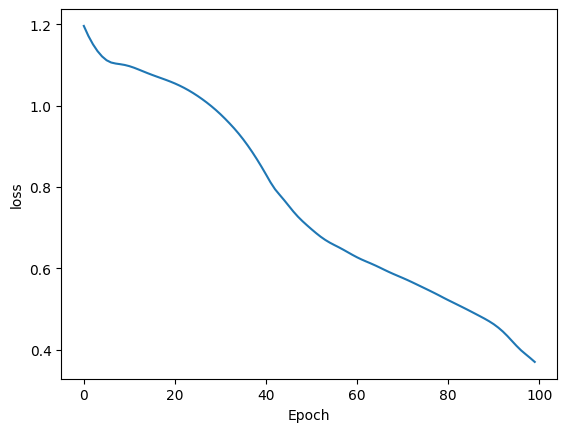

In [155]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('Epoch')

In [156]:
# now send the test data once training is complete
# 1. Note: turn off back propogation, since we are testing NOT training
with torch.no_grad():
  y_eval = model.forward(X_test) #X_test are features from the test set
  loss = criterion(y_eval, y_test)


In [157]:
loss

tensor(0.3541)

In [158]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) str{y_val} \t {y_test[i]} {y_val.argmax().item()}' )

    #correct
    if(y_val.argmax().item() == y_test[i]):
      correct+=1

  print(f'we got {correct} correct')

1.) strtensor([-2.6185,  1.4493,  0.9729]) 	 1 1
2.) strtensor([ 1.3563, -0.1467, -0.9645]) 	 0 0
3.) strtensor([ 1.3197, -0.1654, -1.0760]) 	 0 0
4.) strtensor([-2.7827,  1.5040,  1.0212]) 	 1 1
5.) strtensor([-4.6068,  2.0151,  2.7150]) 	 2 2
6.) strtensor([-5.3064,  2.2510,  2.9876]) 	 2 2
7.) strtensor([ 1.1589, -0.1002, -1.0259]) 	 0 0
8.) strtensor([ 1.3645, -0.1815, -1.0826]) 	 0 0
9.) strtensor([-2.3680,  1.3856,  0.6901]) 	 1 1
10.) strtensor([ 1.3633, -0.1763, -1.0649]) 	 0 0
11.) strtensor([-3.2295,  1.6289,  1.3557]) 	 1 1
12.) strtensor([-4.7756,  2.0159,  3.0328]) 	 2 2
13.) strtensor([-1.6277,  1.1327,  0.2901]) 	 1 1
14.) strtensor([-1.7567,  1.1665,  0.1958]) 	 1 1
15.) strtensor([-4.4329,  1.9333,  2.6442]) 	 2 2
16.) strtensor([-4.6917,  1.9718,  3.1156]) 	 2 2
17.) strtensor([-2.6723,  1.4568,  1.0714]) 	 1 1
18.) strtensor([-4.0476,  1.8196,  2.3310]) 	 2 2
19.) strtensor([-1.8020,  1.2035,  0.2783]) 	 1 1
20.) strtensor([ 1.3630, -0.1752, -1.0612]) 	 0 0
21.) strt

In [159]:
new_iris = torch.tensor([1.2, 3.4, 5.6, 3.2])

In [160]:
with torch.no_grad():
  print(model(new_iris))

tensor([-6.0971,  2.1660,  4.9794])


In [162]:
new_iris2 = torch.tensor([5.0,3.6,1.4,0.2	])

In [163]:
with torch.no_grad():
  print(model(new_iris2))

tensor([ 1.3616, -0.1692, -1.0407])
